# Packages

In [1]:
import pandas as pd
import numpy as np
from numpy import where
import numpy.ma as ma


from netCDF4 import Dataset
import os
import netCDF4

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

import gsw

import xarray as xr

# UPLOADING VARIABLES 


In [2]:
file = 'WOA_ARGO_clim_V2019_NW.nc'
nc= Dataset(file)
print(nc)

year = nc['YEAR'][:]
var= nc['VAR_Z']

lat_ini = nc['LAT'][:]
lon_ini = nc['LON'][:]

idy=np.where(np.logical_and(year>= 2007, year<= 2017))
idy=np.where(np.logical_and(lon_ini >= 44, lon_ini<=56))
idy=np.where(np.logical_and(lat_ini >= 24, lat_ini<=30))
print(idy)
print(idy[0])

# profondeur
zanc=var[0,idy[0],:]
##z=zanc[np.logical_not(np.isnan(zanc))]
#Salinité
Sanc=var[2,idy[0],:]
#Temperature
Tanc=var[3,idy[0],:]
#Densité
Dens=var[4,idy[0],:]


lat = nc['LAT'][idy[0]]
lon = nc['LON'][idy[0]]

var2 = nc['CLIM_Z']

#Salinité
Sanc2=var2[2,idy[0],:]
#Temperature
Tanc2=var2[3,idy[0],:]
#Densité
Dens2=var2[4,idy[0],:]

#Density Anomaly
Dens_ano = Dens- Dens2

# Spiciness
sp = gsw.spiciness0(Sanc,Tanc)
sp_clim= gsw.spiciness0(Sanc2,Tanc2)

# Spiciness Anomaly
sp_ano = sp -sp_clim
print(sp_ano.shape)
print(nc['LAT'][:].shape)
print(nc['LAT'][idy[0]].shape)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Var 0:Depth; 1:Presssure; 2:Salinity; 3:Temperature; 4:Density; 5:Chlorophyl; 6:Oxygen
    dimensions(sizes): N_profile(15098), N_profile_month(5000), N_variable(7), N_clim(5), N_clim_grid(3), Z_dimension(402), Sigma_dimension(1000), Month_dimension(12), Lon_dimension(117), Lat_dimension(105)
    variables(dimensions): float32 LON(N_profile), float32 LAT(N_profile), float32 YEAR(N_profile), float32 MONTH(N_profile), float32 DAY(N_profile), float64 NAME(N_profile), int64 MONTH_dim(Month_dimension), int64 VAR_dim(N_variable), int64 CLIM_dim(N_clim), int64 CLIM_GRID_dim(N_clim_grid), float32 DEPTH(Z_dimension), float32 SIGMA(Sigma_dimension), float32 LON_GRID(Lon_dimension), float32 LAT_GRID(Lat_dimension), float32 LON_MONTH(Month_dimension, N_profile_month), float32 LAT_MONTH(Month_dimension, N_profile_month), float32 VAR_Z(N_variable, N_profile, Z_dimension), float32 CLIM_Z(N_clim, N_p

In [3]:
print(np.min(nc['LAT'][:]))
print(np.max(nc['LAT'][:]))
print(np.min(nc['LON'][:]))
print(np.max(nc['LON'][:]))
print('\\')
print(np.min(lat[:]))
print(np.max(lat[:]))
print(np.min(lon[:]))
print(np.max(lon[:]))
print(Sanc.shape)
print(lat.shape)
print(lon.shape)
print(year.shape)
print(idy)

15.007558
29.916666
40.0
61.222153
\
24.0
29.916666
47.816666
59.869198
(6282, 402)
(6282,)
(6282,)
(15098,)
(array([   49,    50,    51, ..., 15003, 15004, 15005], dtype=int64),)


In [4]:
print(np.nanmax(Dens_ano))
print(np.nanmin(Dens_ano))
print(np.nanmax(sp_ano))
print(np.nanmin(sp_ano))

4.166315
-5.7558994
4.056421137313038
-4.789277740948123


# 1 PROFILE IDX 

In [10]:
print(idy)
print(idy[0])
print(np.max(idy[0]))
print(zanc.shape)

(array([   49,    50,    51, ..., 15003, 15004, 15005], dtype=int64),)
[   49    50    51 ... 15003 15004 15005]
15005
(6282, 402)


In [25]:
idx =np.min(idy[0])
print(idx)
idx=1000
print(Sanc[idx,:])
print(idx)

49
[36.744    36.746    36.746    36.746    36.746    36.426    36.106
 36.137497 36.169    36.2005   36.232    36.242    36.252    36.262
 36.272    36.282    36.2682   36.254402 36.2406   36.226803 36.213
 36.1985   36.184002 36.169502 36.155003 36.140503 36.126    36.1115
 36.097    36.0825   36.068    36.0838   36.0996   36.115402 36.131203
 36.147003 36.1628   36.1786   36.1944   36.2102   36.226    36.2719
 36.317802 36.3637   36.409603 36.4555   36.5014   36.547302 36.5932
 36.639103 36.685    36.673702 36.6624   36.6511   36.6398   36.6285
 36.6172   36.6059   36.5946   36.583298 36.572    36.6065   36.641
 36.6755   36.71           nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan   

In [26]:
# Inititaion des variables 

Spr= Sanc[idx,:]
Tpr= Tanc[idx,:]
dens_ano_pr= Dens_ano[idx,:]
spi_ano_pr = sp_ano[idx,:].data
z_pr = zanc[idx,:]

#remplacer les nans
#Spr[np.isnan(Spr)]= 9999
#Tpr[np.isnan(Tpr)]= 9999
#dens_ano_pr[np.isnan(dens_ano_pr)]= 9999
#spi_ano_pr[np.isnan(spi_ano_pr)]= 9999


 # DataFrame pour le profil IDX

In [27]:
data = pd.DataFrame(list(zip(z_pr,Tpr,Spr,Dens[idx,:],dens_ano_pr,spi_ano_pr)),
               columns =['Depth','Temperature','Salinity','Density','Density Anomaly','Spiciness Anomaly'])
X = pd.DataFrame(data)
# Observe the result
X

,Depth,Temperature,Salinity,Density,Density Anomaly,Spiciness Anomaly
0,0.0,27.170000,36.743999,23.977785,0.110479,-0.334616
1,-5.0,27.160000,36.745998,23.982977,0.083780,-0.322425
2,-10.0,27.139999,36.745998,23.989891,0.061829,-0.325894
3,-15.0,27.115000,36.745998,23.998289,0.055050,-0.321996
4,-20.0,27.090000,36.745998,24.006687,0.011616,-0.270582
...,...,...,...,...,...,...
397,-1985.0,NaN,NaN,NaN,NaN,NaN
398,-1990.0,NaN,NaN,NaN,NaN,NaN
399,-1995.0,NaN,NaN,NaN,NaN,NaN
400,-2000.0,NaN,NaN,NaN,NaN,NaN


## suppression des lignes contenant des Nans de LA DataFrame

In [28]:
index_with_nan = X.index[X.isnull().any(axis=1)]
X.drop(index_with_nan,0, inplace=True) 
X

C:\Users\beyas\AppData\Local\Temp\ipykernel_10652\1444588762.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X.drop(index_with_nan,0, inplace=True)


,Depth,Temperature,Salinity,Density,Density Anomaly,Spiciness Anomaly
0,0.0,27.170000,36.743999,23.977785,0.110479,-0.334616
1,-5.0,27.160000,36.745998,23.982977,0.083780,-0.322425
2,-10.0,27.139999,36.745998,23.989891,0.061829,-0.325894
3,-15.0,27.115000,36.745998,23.998289,0.055050,-0.321996
4,-20.0,27.090000,36.745998,24.006687,0.011616,-0.270582
...,...,...,...,...,...,...
60,-300.0,17.520000,36.571999,26.613628,-0.034569,-0.133055
61,-305.0,17.525002,36.606499,26.639120,-0.020578,-0.042454
62,-310.0,17.530001,36.640999,26.664612,-0.006586,0.047950
63,-315.0,17.535000,36.675499,26.690104,0.007404,0.138151


# KMEANS pour IDX

## 1- CLASSIFICATION : DENSITY ANOMALY // SPICINESS ANOMALY 

In [37]:
km = KMeans(n_clusters= 2)
km

KMeans(n_clusters=2)

In [38]:
y_pred=km.fit_predict(X[['Spiciness Anomaly','Density Anomaly']])
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
X['cluster']= y_pred
X.head()

,Depth,Temperature,Salinity,Density,Density Anomaly,Spiciness Anomaly,cluster
0,0.0,27.170000,36.743999,23.977785,0.110479,-0.334616,1
1,-5.0,27.160000,36.745998,23.982977,0.083780,-0.322425,1
2,-10.0,27.139999,36.745998,23.989891,0.061829,-0.325894,1
3,-15.0,27.115000,36.745998,23.998289,0.055050,-0.321996,1
4,-20.0,27.090000,36.745998,24.006687,0.011616,-0.270582,1


In [40]:
km.cluster_centers_

array([[-0.8846946 ,  0.21560621],
       [-0.19339009,  0.07178954]])

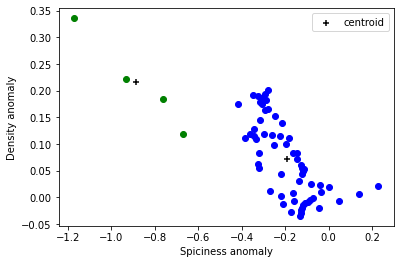

In [41]:
X1  = X[X.cluster==0]
X2  = X[X.cluster==1]
X3  = X[X.cluster==2]

plt.scatter(X1['Spiciness Anomaly'],X1['Density Anomaly'], color= 'green')
plt.scatter(X2['Spiciness Anomaly'],X2['Density Anomaly'], color= 'blue')
plt.scatter(X3['Spiciness Anomaly'],X3['Density Anomaly'], color= 'yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',marker='+', label='centroid')

plt.ylabel('Density anomaly')
plt.xlabel('Spiciness anomaly')
plt.legend()

In [42]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(X[['Depth','Density']])
    sse.append(km.inertia_)

C:\Users\beyas\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
sse

[572035.5625,
 143013.890625,
 63533.65234375,
 35705.64453125,
 22916.447265625,
 15952.74609375,
 11626.6494140625,
 8951.5400390625,
 7175.818359375]

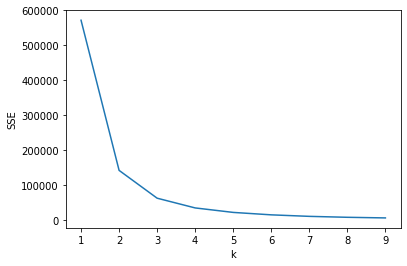

In [44]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

k_rng = range(1,10)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(X[['Spiciness Anomaly','Density Anomaly']])
#if km.inertia_ <= 1 :
    sse.append(km.inertia_)
    #else :
    #pass 
print(sse)

plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

##  2- CLASSIFICATION : TEMPERATURE - SALINTY

In [45]:
kmTS = KMeans(n_clusters= 2)
kmTS

KMeans(n_clusters=2)

In [46]:
y_pred=kmTS.fit_predict(X[['Salinity','Temperature']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
X['clusterTS']= y_pred
X.head()

,Depth,Temperature,Salinity,Density,Density Anomaly,Spiciness Anomaly,cluster,clusterTS
0,0.0,27.170000,36.743999,23.977785,0.110479,-0.334616,1,1
1,-5.0,27.160000,36.745998,23.982977,0.083780,-0.322425,1,1
2,-10.0,27.139999,36.745998,23.989891,0.061829,-0.325894,1,1
3,-15.0,27.115000,36.745998,23.998289,0.055050,-0.321996,1,1
4,-20.0,27.090000,36.745998,24.006687,0.011616,-0.270582,1,1


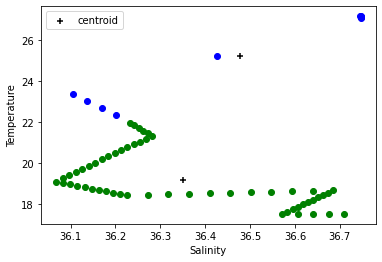

In [48]:
X1  = X[X.clusterTS==0]
X2  = X[X.clusterTS==1]


plt.scatter(X1['Salinity'],X1['Temperature'], color= 'green')
plt.scatter(X2['Salinity'],X2['Temperature'], color= 'blue')
plt.scatter(kmTS.cluster_centers_[:,0],kmTS.cluster_centers_[:,1],color = 'black',marker='+', label='centroid')

plt.ylabel('Temperature')
plt.xlabel('Salinity')
plt.legend()

In [49]:
kmTS.cluster_centers_

array([[36.35041 , 19.197819],
       [36.4767  , 25.227001]], dtype=float32)

In [50]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(X[['Salinity','Temperature']])
    sse.append(km.inertia_)

C:\Users\beyas\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
sse

[441.7650451660156,
 134.04444885253906,
 35.83539581298828,
 21.720136642456055,
 14.478574752807617,
 9.780143737792969,
 6.654941082000732,
 4.5807390213012695,
 3.387141704559326]

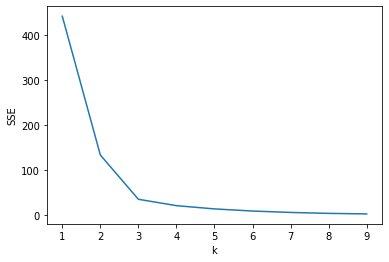

In [52]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

## 3 - CLASSIFICATION : Density - Depth 

In [53]:
kmDD = KMeans(n_clusters= 2)
kmDD

KMeans(n_clusters=2)

In [54]:
y_pred=kmDD.fit_predict(X[['Depth','Density']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
X['clusterDens']= y_pred
X.head()

,Depth,Temperature,Salinity,Density,Density Anomaly,Spiciness Anomaly,cluster,clusterTS,clusterDens
0,0.0,27.170000,36.743999,23.977785,0.110479,-0.334616,1,1,0
1,-5.0,27.160000,36.745998,23.982977,0.083780,-0.322425,1,1,0
2,-10.0,27.139999,36.745998,23.989891,0.061829,-0.325894,1,1,0
3,-15.0,27.115000,36.745998,23.998289,0.055050,-0.321996,1,1,0
4,-20.0,27.090000,36.745998,24.006687,0.011616,-0.270582,1,1,0


In [56]:
kmDD.cluster_centers_

array([[ -77.5     ,   25.17117 ],
       [-240.      ,   26.325087]], dtype=float32)

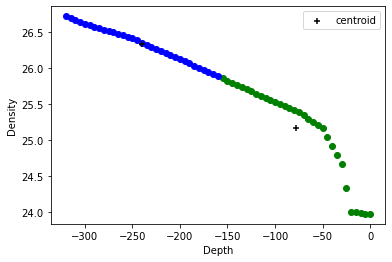

In [57]:
X1  = X[X.clusterDens==0]
X2  = X[X.clusterDens==1]


plt.scatter(X1['Depth'],X1['Density'], color= 'green')
plt.scatter(X2['Depth'],X2['Density'], color= 'blue')

plt.scatter(kmDD.cluster_centers_[:,0],kmDD.cluster_centers_[:,1],color = 'black',marker='+', label='centroid')

plt.ylabel('Density')
plt.xlabel('Depth')
plt.legend()

# DataFrame pour les profiles IDY

In [58]:
print(idy)
print(idy[0])
#print(Sanc.shape)
print(Sanc[0])
print(len(Sanc[0,:]))
len(Sanc[0])

(array([   49,    50,    51, ..., 15003, 15004, 15005], dtype=int64),)
[   49    50    51 ... 15003 15004 15005]
[      nan 37.225986 37.225    37.220318 37.15262  36.59888  36.592373
 36.600914 36.61374  36.630184 36.64333  36.641815 36.641094 36.645786
 36.65266  36.65074  36.654    36.65015  36.631794 36.60037  36.566494
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan     

402

In [59]:
print(zanc.shape)
print(Tanc.shape)
print(Sanc.shape)
print(Dens.shape)
print(Dens_ano.shape)
print(sp_ano.shape)

(6282, 402)
(6282, 402)
(6282, 402)
(6282, 402)
(6282, 402)
(6282, 402)


In [60]:
Z= zanc[0]
for i in range(6282):
    Z= np.append(Z,zanc[i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192


3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878


5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531


In [61]:
T= Tanc[0]
for i in range(6282):
    T= np.append(T,Tanc[i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102


3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826


5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497


In [62]:
S= Sanc[0]
for i in range(6282):
    S= np.append(S,Sanc[i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071


3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798


5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485


In [63]:
D = Dens[0]
for i in range(6282):
    D= np.append(D,Dens[i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071


3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729


5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431


In [64]:
D_ano= Dens_ano[0]
for i in range(6282):
    D_ano= np.append(D_ano,Dens_ano[i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128


3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822


5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535


In [65]:
Sp_ano=sp_ano[0]
for i in range(6282):
    Sp_ano= np.append(Sp_ano,sp_ano[i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105


3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793


5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475


In [66]:
print(len(D_ano))
print(len(T))
print(len(Z))
print(len(D))
print(len(Sp_ano))
print(len(S))

2525766
2525766
2525766
2525766
2525766
2525766


In [67]:
data = pd.DataFrame(list(zip(Z,T,S,D,D_ano,Sp_ano)),
               columns =['Depth','Temperature','Salinity','Density','Density Anomaly','Spiciness Anomaly'])
X = pd.DataFrame(data)
X

,Depth,Temperature,Salinity,Density,Density Anomaly,Spiciness Anomaly
0,0.0,NaN,NaN,NaN,NaN,NaN
1,-5.0,31.166855,37.225986,22.989340,0.423168,-0.218889
2,-10.0,31.153065,37.224998,22.993982,0.312323,-0.096588
3,-15.0,31.148439,37.220318,22.992529,0.025961,0.486190
4,-20.0,30.898382,37.152618,23.030027,-0.265926,0.971973
...,...,...,...,...,...,...
2525761,-1985.0,NaN,NaN,NaN,NaN,NaN
2525762,-1990.0,NaN,NaN,NaN,NaN,NaN
2525763,-1995.0,NaN,NaN,NaN,NaN,NaN
2525764,-2000.0,NaN,NaN,NaN,NaN,NaN


In [70]:
import scipy.io

np.savetxt('Mat_NW_GP', X, delimiter=',') 

# Creation de DATAFRAME de IDY

In [71]:
## suppression des lignes contenant des Nans de LA DataFrame

index_with_nan = X.index[X.isnull().any(axis=1)]
X.drop(index_with_nan,0, inplace=True) 
print(X)

         Depth  Temperature   Salinity    Density  Density Anomaly  \
1         -5.0    31.166855  37.225986  22.989340         0.423168   
2        -10.0    31.153065  37.224998  22.993982         0.312323   
3        -15.0    31.148439  37.220318  22.992529         0.025961   
4        -20.0    30.898382  37.152618  23.030027        -0.265926   
5        -25.0    26.509483  36.598881  24.081823         0.178534   
...        ...          ...        ...        ...              ...   
2524977  -75.0    20.516628  35.965092  25.367926        -0.070227   
2525366  -10.0    27.576462  36.662926  23.785635        -0.143278   
2525367  -15.0    27.576633  36.676060  23.795834        -0.183235   
2525368  -20.0    27.579760  36.666710  23.788145        -0.249748   
2525369  -25.0    27.583050  36.674984  23.793774        -0.413429   

         Spiciness Anomaly  
1                -0.218889  
2                -0.096588  
3                 0.486190  
4                 0.971973  
5             

C:\Users\beyas\AppData\Local\Temp\ipykernel_10652\3253885203.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X.drop(index_with_nan,0, inplace=True)


import numpy as np
class kmeans_missing(object):
    def __init__(self,potential_centroids,n_clusters):
        #initialize with potential centroids
        self.n_clusters=n_clusters
        self.potential_centroids=potential_centroids
    def fit(self,data,max_iter=10,number_of_runs=1):
        n_clusters=self.n_clusters
        potential_centroids=self.potential_centroids

        dist_mat=np.zeros((data.shape[0],n_clusters))
        all_centroids=np.zeros((n_clusters,data.shape[1],number_of_runs))

        costs=np.zeros((number_of_runs,))
        for k in range(number_of_runs):
            idx=np.random.choice(range(potential_centroids.shape[0]), size=(n_clusters), replace=False)
            centroids=potential_centroids[idx]
            clusters=np.zeros(data.shape[0])
            old_clusters=np.zeros(data.shape[0])
            for i in range(max_iter):
                #Calc dist to centroids
                for j in range(n_clusters):
                    dist_mat[:,j]=np.nansum((data-centroids[j])**2,axis=1)
                #Assign to clusters
                clusters=np.argmin(dist_mat,axis=1)
                #Update clusters
                for j in range(n_clusters):
                    centroids[j]=np.nanmean(data[clusters==j],axis=0)
                if all(np.equal(clusters,old_clusters)):
                    break # Break when to change in clusters
                if i==max_iter-1:
                    print('no convergence before maximal iterations are reached')
                else:
                    clusters,old_clusters=old_clusters,clusters

            all_centroids[:,:,k]=centroids
            costs[k]=np.mean(np.min(dist_mat,axis=1))
        self.costs=costs
        self.cost=np.min(costs)
        self.best_model=np.argmin(costs)
        self.centroids=all_centroids[:,:,self.best_model]
        self.all_centroids=all_centroids
        
    def predict(self,data):
        dist_mat=np.zeros((data.shape[0],self.n_clusters))
        for j in range(self.n_clusters):
            dist_mat[:,j]=np.nansum((data-self.centroids[j])**2,axis=1)
        prediction=np.argmin(dist_mat,axis=1)
        cost=np.min(dist_mat,axis=1)
        return prediction,cost

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from kmeans_missing import *

def make_fake_data(fraction_missing, n_clusters=5, n_samples=1500,
                   n_features=2, seed=None):
    # complete data
    gen = np.random.RandomState(seed)
    X, true_labels = make_blobs(n_samples, n_features, n_clusters,
                                random_state=gen)
    # with missing values
    missing = gen.rand(*X.shape) < fraction_missing
    Xm = np.where(missing, np.nan, X)
    return X, true_labels, Xm
X, true_labels, X_hat = make_fake_data(fraction_missing=0.3, n_clusters=3, seed=0)
X_missing_dummies=np.isnan(X_hat)
n_clusters=3
X_hat = np.concatenate((X_hat,X_missing_dummies),axis=1)
kmeans_m=kmeans_missing(X_hat,n_clusters)
kmeans_m.fit(X_hat,max_iter=100,number_of_runs=10)
print(kmeans_m.costs)
prediction,cost=kmeans_m.predict(X_hat)

for i in range(n_clusters):
    print([np.mean((prediction==i)*(true_labels==j)) for j in range(3)],np.mean((prediction==i)))

## 1- CLASSIFICATION : DENSITY  / DEPTH

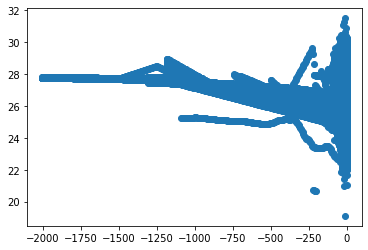

In [72]:
plt.scatter(X['Depth'],X['Density'])

In [73]:
km = KMeans(n_clusters= 2)
km

KMeans(n_clusters=2)

In [74]:
y_pred=km.fit_predict(X[['Depth','Density']])
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [75]:
X['cluster']= y_pred
X.head()

,Depth,Temperature,Salinity,Density,Density Anomaly,Spiciness Anomaly,cluster
1,-5.0,31.166855,37.225986,22.989340,0.423168,-0.218889,1
2,-10.0,31.153065,37.224998,22.993982,0.312323,-0.096588,1
3,-15.0,31.148439,37.220318,22.992529,0.025961,0.486190,1
4,-20.0,30.898382,37.152618,23.030027,-0.265926,0.971973,1
5,-25.0,26.509483,36.598881,24.081823,0.178534,-0.170060,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


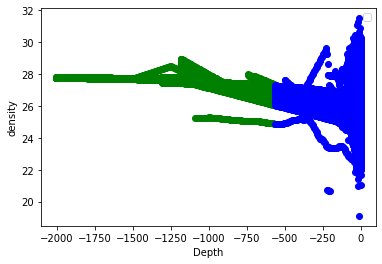

In [76]:
X1  = X[X.cluster==0]
X2  = X[X.cluster==1]



plt.scatter(X1['Depth'],X1['Density'], color= 'green')
plt.scatter(X2['Depth'],X2['Density'], color= 'blue')

plt.xlabel('Depth')
plt.ylabel('density')
plt.legend()

In [77]:
km.cluster_centers_

array([[-875.9889  ,   27.380562],
       [-257.69733 ,   26.180334]], dtype=float32)

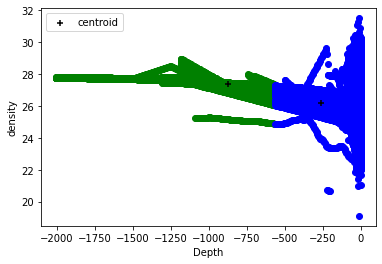

In [78]:
plt.scatter(X1['Depth'],X1['Density'], color= 'green')
plt.scatter(X2['Depth'],X2['Density'], color= 'blue')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',marker='+', label='centroid')

plt.xlabel('Depth')
plt.ylabel('density')
plt.legend()

In [79]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(X[['Depth','Density']])
    sse.append(km.inertia_)

In [80]:
sse

[82452930560.0,
 22184040448.0,
 11226912768.0,
 7251405312.0,
 4952377344.0,
 3261878784.0,
 2382213376.0,
 1849006080.0,
 1472547328.0]

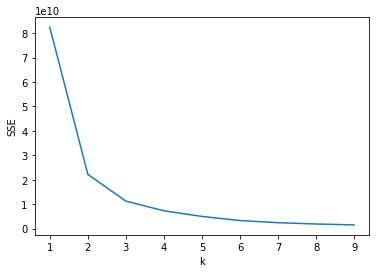

In [81]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

## 2- CLASSIFICATION : DENSITY ANOMALY // SPICINESS ANOMALY 

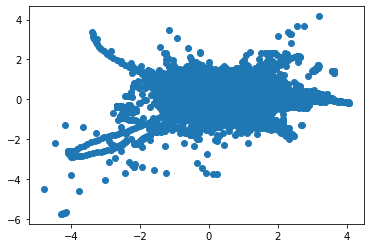

In [82]:
plt.scatter(X['Spiciness Anomaly'],X['Density Anomaly'])

In [99]:
km2 = KMeans(n_clusters= 2)
km2

KMeans(n_clusters=2)

In [100]:
y_pred=km2.fit_predict(X[['Spiciness Anomaly','Density Anomaly']])
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [101]:
X['cluster']= y_pred
X.head()

,Depth,Temperature,Salinity,Density,Density Anomaly,Spiciness Anomaly,cluster
1,-5.0,31.166855,37.225986,22.989340,0.423168,-0.218889,0
2,-10.0,31.153065,37.224998,22.993982,0.312323,-0.096588,0
3,-15.0,31.148439,37.220318,22.992529,0.025961,0.486190,1
4,-20.0,30.898382,37.152618,23.030027,-0.265926,0.971973,1
5,-25.0,26.509483,36.598881,24.081823,0.178534,-0.170060,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


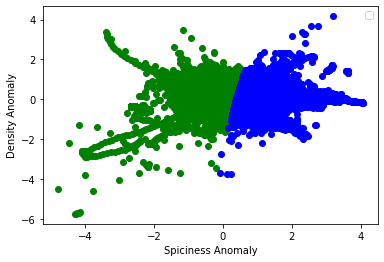

In [102]:
X1  = X[X.cluster==0]
X2  = X[X.cluster==1]



plt.scatter(X1['Spiciness Anomaly'],X1['Density Anomaly'], color= 'green')
plt.scatter(X2['Spiciness Anomaly'],X2['Density Anomaly'], color= 'blue')

plt.xlabel('Spiciness Anomaly')
plt.ylabel('Density Anomaly')
plt.legend()

In [103]:
km2.cluster_centers_

array([[-1.20396802e-03,  3.70235717e-04],
       [ 7.55007118e-01, -1.22331732e-01]])

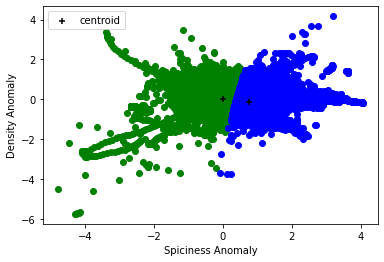

In [104]:
X1  = X[X.cluster==0]
X2  = X[X.cluster==1]



plt.scatter(X1['Spiciness Anomaly'],X1['Density Anomaly'], color= 'green')
plt.scatter(X2['Spiciness Anomaly'],X2['Density Anomaly'], color= 'blue')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color = 'black',marker='+', label='centroid')

plt.xlabel('Spiciness Anomaly')
plt.ylabel('Density Anomaly')
plt.legend()

In [105]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(X[['Depth','Density']])
    sse.append(km.inertia_)

In [106]:
sse

[82452930560.0,
 22184040448.0,
 11228655616.0,
 7251139584.0,
 4943846400.0,
 3265505280.0,
 2380354048.0,
 1846114560.0,
 1474671744.0]

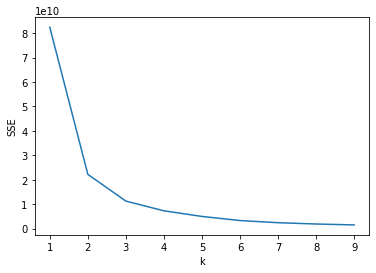

In [107]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

## 3-Temperature - Salinity 

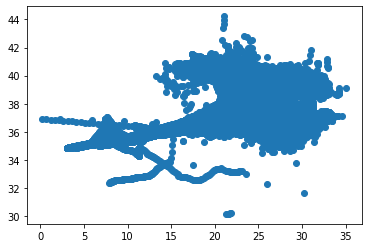

In [123]:
plt.scatter(X['Temperature'],X['Salinity'])

In [124]:
km3= KMeans(n_clusters= 2)
km3

KMeans(n_clusters=2)

In [126]:
y_pred=km3.fit_predict(X[['Salinity','Temperature']])
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
X['cluster']= y_pred
X.head()

,Depth,Temperature,Salinity,Density,Density Anomaly,Spiciness Anomaly,cluster
1,-5.0,31.166855,37.225986,22.989340,0.423168,-0.218889,0
2,-10.0,31.153065,37.224998,22.993982,0.312323,-0.096588,0
3,-15.0,31.148439,37.220318,22.992529,0.025961,0.486190,0
4,-20.0,30.898382,37.152618,23.030027,-0.265926,0.971973,0
5,-25.0,26.509483,36.598881,24.081823,0.178534,-0.170060,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


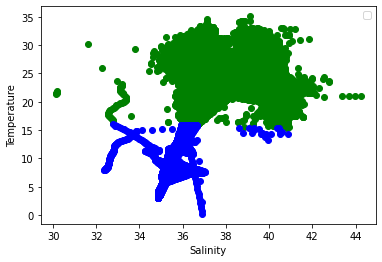

In [128]:
X1  = X[X.cluster==0]
X2  = X[X.cluster==1]



plt.scatter(X1['Salinity'],X1['Temperature'], color= 'green')
plt.scatter(X2['Salinity'],X2['Temperature'], color= 'blue')

plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.legend()

In [129]:
km3.cluster_centers_

array([[36.70299 , 20.751148],
       [35.650944, 11.020029]], dtype=float32)

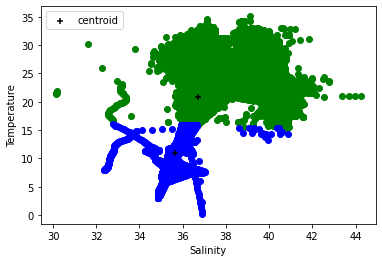

In [130]:
X1  = X[X.cluster==0]
X2  = X[X.cluster==1]

plt.scatter(X1['Salinity'],X1['Temperature'], color= 'green')
plt.scatter(X2['Salinity'],X2['Temperature'], color= 'blue')

plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color = 'black',marker='+', label='centroid')

plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.legend()

In [163]:
Centroine_NW_GP= [{'Depth1':km.cluster_centers_[0,0],'Depth2':km.cluster_centers_[1,0],'Temperature1':km3.cluster_centers_[0,1],'Temperature2':km3.cluster_centers_[1,1],'Salinity1':km3.cluster_centers_[0,0],'Salinity2':km3.cluster_centers_[1,0],'Density1':km.cluster_centers_[0,1],'Density2':km3.cluster_centers_[1,1],'Density Anomaly 1':km2.cluster_centers_[0,1],'Density Anomaly2':km2.cluster_centers_[1,1],'Spiciness Anomaly 1':km2.cluster_centers_[0,0],'Spiciness Anomaly2':km2.cluster_centers_[1,0]}]

In [162]:

Centroine_NW_GP


[{'Depth1': -481.86633,
  'Depth2': -191.88004,
  'Temperature1': 20.751148,
  'Temperature2': 11.020029,
  'Salinity1': 36.70299,
  'Salinity2': 35.650944,
  'Density1': 27.026896,
  'density2': 11.020029,
  'Density Anomaly 1': 0.00037023571656127213,
  'Density Anomaly2': -0.1223317324839972,
  'Spiciness Anomaly 1': -0.0012039680160432914,
  'Spiciness Anomaly2': 0.7550071180845265}]